In [630]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

import gender

In [631]:
data = pd.read_csv('../source_data/train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [661]:
# Converting target column from boolean to int
data['Transported'] = data['Transported'].astype(int)
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [632]:
# Checking missing values and their percentage in the dataset
mv_data = pd.DataFrame({
    'Feature': data.columns,
    'Missing Values': data.isna().sum().values,
})
mv_data['Ratio'] = round((mv_data['Missing Values'] / len(data)) * 100, 2)
mv_data

,Feature,Missing Values,Ratio
0,PassengerId,0,0.00
1,HomePlanet,201,2.31
2,CryoSleep,217,2.50
3,Cabin,199,2.29
4,Destination,182,2.09
5,Age,179,2.06
6,VIP,203,2.34
7,RoomService,181,2.08
8,FoodCourt,183,2.11
9,ShoppingMall,208,2.39


#### Step 1 - Filling the missing values in the `HomePlanet` feature
##### Criterion: if the passengers are in the same cabin and at least one of them has a `HomePlanet` value

---



In [633]:
training_set = data
training_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [634]:
# Distribution of the passenger by HomePlanet
home_planet = training_set['HomePlanet'].value_counts(dropna=False).to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)
home_planet

,count,ratio
HomePlanet,,
Earth,4602,52.94
Europa,2131,24.51
Mars,1759,20.23
NaN,201,2.31


In [635]:
# Select all duplicated Cabin values
# We want to find all passengers who share the same cabin,
# as they are most likely from the same HomePlanet.
duplicates = training_set[training_set['Cabin'].duplicated(keep=False)]
duplicates

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
11,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [636]:
# Check all NaN HomePlanet values
# We want to see all passengers missing a HomePlanet value
duplicates[duplicates['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
438,0470_02,NaN,True,F/86/S,TRAPPIST-1e,36.0,False,0.0,0.0,0.0,0.0,0.0,Jurs Binie,True
471,0504_06,NaN,True,B/19/S,55 Cancri e,53.0,False,0.0,0.0,0.0,0.0,0.0,Alheneb Unpasine,True
501,0539_03,NaN,True,C/18/P,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,Alderak Nalanet,True
505,0540_02,NaN,False,F/95/S,TRAPPIST-1e,17.0,False,1471.0,0.0,0.0,45.0,16.0,Rantax Conie,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,8816_02,NaN,True,B/340/S,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Mesatik Diouselt,True
8295,8860_02,NaN,True,F/1825/P,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Guls Vloaf,True
8353,8938_01,NaN,True,F/1729/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Quites Must,True
8489,9072_01,NaN,True,F/1758/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Gork Creke,True


In [637]:
# Add HomePlanet for passengers who share the same cabin
import importlib
import functions.add_home_planet
importlib.reload(functions.add_home_planet)
from functions.add_home_planet import add_home_planet

In [638]:
pipeline_preprocessing = Pipeline([
    ('HomePlanet', FunctionTransformer(add_home_planet))
])

training_set = pipeline_preprocessing.fit_transform(training_set)

In [639]:
# Checking missing values after adding HomePlanet for records where it is logically applicable
training_set['HomePlanet'].isna().sum()

np.int64(148)

In [640]:
planet_ratios = {
    'Earth': 52.94,
    'Europa': 24.51,
    'Mars': 20.23
}

In [641]:
# Finding the rows with missing values
mask = training_set['HomePlanet'].isna()
n_missing = mask.sum()

In [642]:
# Calculate how many rows for every planet we need to fill
counts_to_fill = (
    (pd.Series(planet_ratios) / 100 * n_missing)
    .round()
    .astype(int)
)
counts_to_fill

Earth     78
Europa    36
Mars      30
dtype: int64

In [643]:
# Generate list with the planets depends on distribution
fill_values = np.concatenate([
    [planet] * count for planet, count in counts_to_fill.items()
])

In [644]:
# if due to rounding there are missing or extra values — adjust accordingly
diff = n_missing - len(fill_values)
if diff > 0:
    fill_values = np.append(fill_values, np.random.choice(list(planet_ratios.keys()), diff))
elif diff < 0:
    fill_values = fill_values[:diff]

In [645]:
np.random.shuffle(fill_values)

In [646]:
training_set.loc[mask, 'HomePlanet'] = fill_values

In [647]:
training_set['HomePlanet'].isna().sum()

np.int64(0)

### Handling Duplicate Cabins and Missing `HomePlanet` Values

In this step, we extracted all cabins that have duplicates.  
Then, from this list, we filtered out all records where the `HomePlanet` value is missing.  
After that, we manually checked each passenger ID.  
If two or more passengers share the same cabin and one of them has a missing `HomePlanet` value,  
we assigned the same value from the other passenger(s) in that cabin.  

This is a more reliable approach for filling the missing values.

#### Step 2 - Filling the missing values in the `CryoSleep` feature
##### Criterion: According to the percentage distribution of non-missing values grouped by HomePlanet

---



In [648]:
training_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


#### We will explore the data and look for an approach to fill the missing values

In [649]:
# We split the dataset into two parts – the first part contains data with no missing values for CryoSleep, 
# and the second part contains data with missing values for CryoSleep.
not_missing_cryo = training_set[training_set['CryoSleep'].notna()]
missing_cryo_sleep = training_set[training_set['CryoSleep'].isna()]

In [650]:
not_missing_cryo

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [651]:
# Displaying the ratio and distribution of not missing CryoSleep values
not_missing_cryo['HomePlanet'].value_counts().to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)

,count,ratio
HomePlanet,,
Earth,4580,54.03
Europa,2132,25.15
Mars,1764,20.81


In [652]:
# The distribution of passengers who are in CryoSleep and those who are not, grouped by HomePlanet. 
# The goal is to maintain this ratio in order to fill in the missing values for the CryoSleep feature.
cryo_sleep_passengers_group_by_planet = (
    not_missing_cryo
    .groupby(['HomePlanet', 'CryoSleep'])
    .size()
    .to_frame('count')
    .assign(
        ratio=lambda x: round(x['count'] / x.groupby(level=0)['count'].transform('sum') * 100, 2)
    )
)

cryo_sleep_passengers_group_by_planet

count  ratio
HomePlanet CryoSleep              
Earth      False       3170  69.21
           True        1410  30.79
Europa     False       1196  56.10
           True         936  43.90
Mars       False       1073  60.83
           True         691  39.17

In [653]:
missing_cryo_sleep

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,True
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True


In [654]:
# Displaying the ratio and distribution of missing CryoSleep values grouped by Home Planet
missing_cryo_sleep['HomePlanet'].value_counts().to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)

,count,ratio
HomePlanet,,
Earth,115,53.00
Europa,59,27.19
Mars,43,19.82


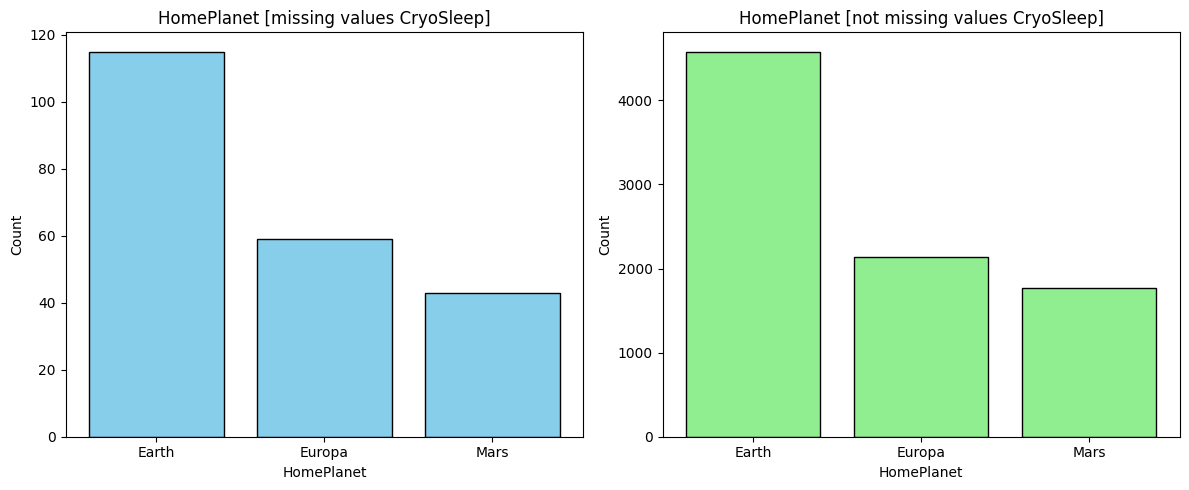

In [655]:
counts_missing = missing_cryo_sleep['HomePlanet'].value_counts()
counts_not_missing = not_missing_cryo['HomePlanet'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(counts_missing.index, counts_missing.values, color='skyblue', edgecolor='black')
ax1.set_title('HomePlanet [missing values CryoSleep]')
ax1.set_xlabel('HomePlanet')
ax1.set_ylabel('Count')

ax2.bar(counts_not_missing.index, counts_not_missing.values, color='lightgreen', edgecolor='black')
ax2.set_title('HomePlanet [not missing values CryoSleep]')
ax2.set_xlabel('HomePlanet')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [656]:
ratio_dict = (
    cryo_sleep_passengers_group_by_planet
    .reset_index()
    .pivot(index='HomePlanet', columns='CryoSleep', values='ratio')
    .fillna(0)
)
ratio_dict

CryoSleep,False,True
HomePlanet,,
Earth,69.21,30.79
Europa,56.10,43.90
Mars,60.83,39.17


In [657]:
def fill_cryo(row):
    if pd.isna(row['CryoSleep']):
        probs = ratio_dict.loc[row['HomePlanet']] / 100
        return np.random.choice([False, True], p=[probs[False], probs[True]])
    return row['CryoSleep']

training_set['CryoSleep'] = training_set.apply(fill_cryo, axis=1)

In [658]:
# Checking for missing values
training_set['CryoSleep'].isna().sum()

np.int64(0)

In [659]:
# Converting CryoSleep values from boolean to int
training_set['CryoSleep'] = training_set['CryoSleep'].astype(int)

In [660]:
training_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
